### IMPORTAR LIBRERIAS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

### DESCARGA DE DATOS

In [3]:
df = pd.read_csv('../data/raw/winequality.csv')
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

##### Descripción de los Atributos:
* Acidez Fija (g/L): Mide la acidez no volátil del vino, aportada principalmente por el ácido tartárico, un componente natural del jugo de uva. Una acidez fija más alta indica un vino más ácido, lo que puede influir en el sabor y el potencial de envejecimiento del vino.

* Acidez Volátil (g/L): Mide la concentración de ácidos volátiles, principalmente ácido acético, en el vino. Un exceso de acidez volátil, a menudo causado por la degradación bacteriana, puede producir un aroma y sabor desagradables similares al vinagre.

* Ácido Cítrico (g/L): Mide la cantidad de ácido cítrico, otro componente natural del jugo de uva, presente en el vino. El ácido cítrico contribuye a la acidez y frescura del vino, influyendo en la percepción general de su sabor.

* Azúcar Residual (g/L): Mide el azúcar no fermentado que permanece en el vino después de la fermentación. El nivel de azúcar residual desempeña un papel crucial en la determinación de la dulzura del vino, abarcando estilos que van de seco a dulce.

* Cloruros (g/L): Mide la concentración de sales de cloruro, principalmente cloruro de sodio, en el vino. Los niveles de cloruro pueden influir en la salinidad y el equilibrio del vino, afectando potencialmente la percepción general de su sabor.

* Dióxido de Azufre Libre (mg/L): Mide la concentración de moléculas de dióxido de azufre que no están unidas a otros compuestos en el vino. El dióxido de azufre es un conservante común utilizado para prevenir la degradación y oxidación del vino, pero niveles excesivos pueden impartir un olor y sabor fuerte y sulfurado.

* Dióxido de Azufre Total (mg/L): Mide la cantidad total de dióxido de azufre, incluyendo tanto la forma libre como la ligada, presente en el vino. El contenido total de dióxido de azufre es importante para mantener la calidad del vino y prevenir su deterioro, aunque niveles excesivos pueden impactar negativamente en las características sensoriales del vino.

* Densidad (g/cm³): Mide la masa por unidad de volumen del vino. La densidad del vino está influenciada por factores como el contenido de alcohol y azúcar. Una densidad más alta generalmente indica un mayor contenido de alcohol o un vino más dulce.

* Sulfatos (g/L): Mide la concentración de sales de sulfato, principalmente sulfato de potasio, en el vino. Los sulfatos están presentes de forma natural en las uvas y también pueden añadirse durante los procesos de vinificación. Niveles excesivos de sulfatos pueden contribuir a un sabor amargo o metálico en el vino.

* Alcohol (porcentaje en volumen): Mide el porcentaje de alcohol en volumen presente en el vino. El alcohol es un factor primario que influye en el sabor, cuerpo y complejidad del vino. Niveles más altos de alcohol generalmente resultan en vinos de cuerpo más completo, con aromas y sabores más intensos.

##### Referencia:
Cortez, Paulo, Cerdeira, A., Almeida, F., Matos, T., y Reis, J. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

###  1. ANÁLISIS DEL SET DE DATOS

In [90]:
df.shape

(1599, 12)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [92]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [93]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [94]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

* POSIBLES VARIABLES PREDICTORAS/FEATURES (X)

In [95]:
print('fixed acidity:', df['fixed acidity'].unique())
print('fixed acidity:', df['fixed acidity'].nunique())
print('fixed acidity:', df['fixed acidity'].value_counts(ascending=False))
print('fixed acidity max:', df['fixed acidity'].max())
print('fixed acidity min:', df['fixed acidity'].min())


fixed acidity: [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
fixed acidity: 96
fixed acidity: fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
14.3     1
12.1     1
15.9     1
4.9      1
5.5      1
Name: count, Length: 96, dtype: int64
fixed acidity max: 15.9
fixed acidity min: 4.6


In [96]:
print('volatile acidity:', df['volatile acidity'].unique())
print('volatile acidity:', df['volatile acidity'].nunique())
print('volatile acidity:', df['volatile acidity'].value_counts(ascending=False))
print('volatile acidity max:', df['volatile acidity'].max())
print('volatile acidity min:', df['volatile acidity'].min())


volatile acidity: [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.975 0.26  0.87  0.18
 0.27  0.2   0.36  0.83  0.46  0.47  0.77  0.815 0.795 0.665 0.765 0.24
 0.85  0.84  0.96  0.78  0.23  0.315 0.365 0.25  0.825 0.72  0.595 0.585
 0.915 0.755 0.845 1.24  0.8   0.98  1.185 0.92  1.035 1.025 0.565 0.74
 1.115 0.865 0.875 0.965 0.91  0.89  1.01  0.305 0.395 0.12  0.86  0.295
 1.005 0.19  0.955 0.16  1.58  0.79  1.18  0.475 0.81  0.895 0.855]
volatile acidity: 143
volatile acidity: volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.580    38
 

In [97]:
print('citric acid:', df['citric acid'].unique())
print('citric acid:', df['citric acid'].nunique())
print('citric acid:', df['citric acid'].value_counts(ascending=False))
print('citric acid max:', df['citric acid'].max())
print('citric acid min:', df['citric acid'].min())

citric acid: [0.   0.04 0.56 0.06 0.02 0.36 0.08 0.29 0.18 0.19 0.28 0.51 0.48 0.31
 0.21 0.11 0.14 0.16 0.24 0.07 0.12 0.25 0.09 0.3  0.2  0.22 0.15 0.43
 0.52 0.23 0.37 0.26 0.57 0.4  0.49 0.05 0.54 0.64 0.7  0.47 0.44 0.17
 0.68 0.53 0.1  0.01 0.55 1.   0.03 0.42 0.33 0.32 0.35 0.6  0.74 0.58
 0.5  0.76 0.46 0.45 0.38 0.39 0.66 0.62 0.67 0.79 0.63 0.61 0.71 0.65
 0.59 0.34 0.69 0.73 0.72 0.41 0.27 0.75 0.13 0.78]
citric acid: 80
citric acid: citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.79      1
0.71      1
0.72      1
0.75      1
0.78      1
Name: count, Length: 80, dtype: int64
citric acid max: 1.0
citric acid min: 0.0


In [98]:
print('residual sugar:', df['residual sugar'].unique())
print('residual sugar:', df['residual sugar'].nunique())
print('residual sugar:', df['residual sugar'].value_counts(ascending=False))
print('residual sugar max:', df['residual sugar'].max())
print('residual sugar min:', df['residual sugar'].min())


residual sugar: [ 1.9   2.6   2.3   1.8   1.6   1.2   2.    6.1   3.8   3.9   1.7   4.4
  2.4   1.4   2.5  10.7   5.5   2.1   1.5   5.9   2.8   2.2   3.    3.4
  5.1   4.65  1.3   7.3   7.2   2.9   2.7   5.6   3.1   3.2   3.3   3.6
  4.    7.    6.4   3.5  11.    3.65  4.5   4.8   2.95  5.8   6.2   4.2
  7.9   3.7   6.7   6.6   2.15  5.2   2.55 15.5   4.1   8.3   6.55  4.6
  4.3   5.15  6.3   6.    8.6   7.5   2.25  4.25  2.85  3.45  2.35  2.65
  9.    8.8   5.    1.65  2.05  0.9   8.9   8.1   4.7   1.75  7.8  12.9
 13.4   5.4  15.4   3.75 13.8   5.7  13.9 ]
residual sugar: 91
residual sugar: residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
12.90      1
5.40       1
3.75       1
5.70       1
13.90      1
Name: count, Length: 91, dtype: int64
residual sugar max: 15.5
residual sugar min: 0.9


In [99]:
print('chlorides:', df['chlorides'].unique())
print('chlorides:', df['chlorides'].nunique())
print('chlorides:', df['chlorides'].value_counts(ascending=False))
print('chlorides max:', df['chlorides'].max())
print('chlorides min:', df['chlorides'].min())

chlorides: [0.076 0.098 0.092 0.075 0.069 0.065 0.073 0.071 0.097 0.089 0.114 0.176
 0.17  0.368 0.086 0.341 0.077 0.082 0.106 0.084 0.085 0.08  0.105 0.083
 0.103 0.066 0.172 0.074 0.088 0.332 0.05  0.054 0.113 0.068 0.081 0.11
 0.07  0.111 0.079 0.115 0.094 0.093 0.104 0.464 0.401 0.062 0.107 0.045
 0.058 0.102 0.467 0.091 0.122 0.09  0.119 0.178 0.146 0.072 0.118 0.049
 0.06  0.117 0.087 0.236 0.61  0.095 0.1   0.36  0.067 0.27  0.099 0.046
 0.061 0.056 0.039 0.059 0.101 0.057 0.337 0.078 0.263 0.063 0.611 0.064
 0.096 0.358 0.343 0.186 0.112 0.213 0.214 0.121 0.128 0.052 0.12  0.116
 0.109 0.159 0.124 0.174 0.047 0.127 0.413 0.152 0.053 0.055 0.051 0.125
 0.2   0.171 0.226 0.25  0.108 0.148 0.143 0.222 0.157 0.422 0.034 0.387
 0.415 0.243 0.241 0.19  0.132 0.126 0.038 0.044 0.041 0.165 0.048 0.145
 0.147 0.012 0.194 0.161 0.123 0.414 0.216 0.043 0.042 0.369 0.166 0.136
 0.403 0.137 0.168 0.153 0.267 0.169 0.205 0.235 0.23 ]
chlorides: 153
chlorides: chlorides
0.080    66
0.074    5

In [100]:
print('free sulfur dioxide:', df['free sulfur dioxide'].unique())
print('free sulfur dioxide:', df['free sulfur dioxide'].nunique())
print('free sulfur dioxide:', df['free sulfur dioxide'].value_counts(ascending=False))

print('free sulfur dioxide max:', df['free sulfur dioxide'].max())
print('free sulfur dioxide min:', df['free sulfur dioxide'].min())


free sulfur dioxide: [11.  25.  15.  17.  13.   9.  16.  52.  51.  35.   6.  29.  23.  10.
 21.   4.  14.   8.  22.  40.   5.   3.   7.  12.  30.  33.  50.  19.
 20.  27.  18.  28.  34.  42.  41.  37.  32.  36.  24.  26.  39.  40.5
 68.  31.  38.  43.  47.   1.  54.  46.  45.   2.   5.5 53.  37.5 57.
 48.  72.  55.  66. ]
free sulfur dioxide: 60
free sulfur dioxide: free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
23.0     32
26.0     32
20.0     30
27.0     29
25.0     24
28.0     23
29.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
33.0     11
36.0     11
38.0      9
41.0      7
40.0      6
39.0      5
51.0      4
48.0      4
45.0      3
52.0      3
37.0      3
42.0      3
1.0       3
43.0      3
50.0      2
68.0      2
55.0      2
37.5      2
40.5      1

In [101]:
print('total sulfur dioxide:', df['total sulfur dioxide'].unique())
print('total sulfur dioxide:', df['total sulfur dioxide'].nunique())
print('total sulfur dioxide:', df['total sulfur dioxide'].value_counts(ascending=False))
print('total sulfur dioxide max:', df['total sulfur dioxide'].max())
print('total sulfur dioxide min:', df['total sulfur dioxide'].min())

total sulfur dioxide: [ 34.   67.   54.   60.   40.   59.   21.   18.  102.   65.   29.  145.
 148.  103.   56.   71.   37.   23.   11.   35.   16.   82.  113.   83.
  50.   15.   30.   19.   87.   46.   14.  114.   12.   96.  119.   73.
  45.   10.  110.   52.  112.   39.   27.   94.   43.   42.   80.   51.
  61.  136.   31.  125.   24.  140.  133.   85.  106.   22.   36.   69.
  64.  153.   47.  108.  111.   62.   28.   89.   13.   90.  134.   99.
  26.   63.  105.   20.  141.   88.  129.  128.   86.  121.  101.   44.
   8.   49.   38.  143.  144.  127.  126.  120.   55.   93.   95.   41.
  58.   72.   81.  109.   33.   53.   98.   48.   70.   25.  135.   92.
  74.   32.   77.  165.   75.  124.   78.  122.   66.   68.   17.   91.
  76.  151.  142.  116.  149.   57.  104.   84.  147.  155.  152.    9.
 139.  130.    7.  100.  115.    6.   79.  278.  289.  160.   77.5 131. ]
total sulfur dioxide: 144
total sulfur dioxide: total sulfur dioxide
28.0     43
24.0     36
18.0     35
15.0   

In [102]:
print('density:', df['density'].unique())
print('density:', df['density'].nunique())
print('density:', df['density'].value_counts(ascending=False))
print('density max:', df['density'].max())
print('density min:', df['density'].min())


density: [0.9978  0.9968  0.997   0.998   0.9964  0.9946  0.9959  0.9943  0.9974
 0.9986  0.9969  0.9982  0.9966  0.9955  0.9962  0.9972  0.9958  0.9993
 0.9957  0.9975  0.994   0.9976  0.9934  0.9954  0.9971  0.9956  0.9983
 0.9967  0.9961  0.9984  0.9938  0.9932  0.9965  0.9963  0.996   0.9973
 0.9988  0.9937  0.9952  0.9916  0.9944  0.9996  0.995   0.9981  0.9953
 0.9924  0.9948  0.99695 0.99545 0.99615 0.9994  0.99625 0.99585 0.99685
 0.99655 0.99525 0.99815 0.99745 0.9927  0.99675 0.99925 0.99565 1.00005
 0.9985  0.99965 0.99575 0.9999  1.00025 0.9987  0.99935 0.99735 0.99915
 0.9991  1.00015 0.9997  1.001   0.9979  1.0014  1.0001  0.99855 0.99845
 0.9998  0.99645 0.99865 0.9989  0.99975 0.999   1.0015  1.0002  0.9992
 1.0008  1.      1.0006  1.0004  1.0018  0.9912  1.0022  1.0003  0.9949
 0.9951  1.0032  0.9947  0.9995  0.9977  1.0026  1.00315 1.0021  0.9917
 0.9922  0.9921  0.99788 1.00024 0.99768 0.99782 0.99761 0.99803 0.99785
 0.99656 0.99488 0.99823 0.99779 0.99738 0.99701 0

In [103]:
print('pH:', df['pH'].unique())
print('pH:', df['pH'].nunique())
print('pH:', df['pH'].value_counts(ascending=False))
print('pH max:', df['pH'].max())
print('pH min:', df['pH'].min())

pH: [3.51 3.2  3.26 3.16 3.3  3.39 3.36 3.35 3.28 3.58 3.17 3.11 3.38 3.04
 3.52 3.43 3.34 3.47 3.46 3.45 3.4  3.42 3.23 3.5  3.33 3.21 3.48 3.9
 3.25 3.32 3.15 3.41 3.44 3.31 3.54 3.13 2.93 3.14 3.75 3.85 3.29 3.08
 3.37 3.19 3.07 3.49 3.53 3.24 3.63 3.22 3.68 2.74 3.59 3.   3.12 3.57
 3.61 3.06 3.6  3.69 3.1  3.05 3.67 3.27 3.18 3.02 3.55 2.99 3.01 3.56
 3.03 3.62 2.88 2.95 2.98 3.09 2.86 3.74 2.92 3.72 2.87 2.89 2.94 3.66
 3.71 3.78 3.7  4.01 2.9 ]
pH: 89
pH: pH
3.30    57
3.36    56
3.26    53
3.39    48
3.38    48
        ..
2.86     1
2.87     1
3.74     1
3.70     1
2.90     1
Name: count, Length: 89, dtype: int64
pH max: 4.01
pH min: 2.74


In [104]:
print('sulphates:', df['sulphates'].unique())
print('sulphates:', df['sulphates'].nunique())
print('sulphates:', df['sulphates'].value_counts(ascending=False))
print('sulphates max:', df['sulphates'].max())
print('sulphates min:', df['sulphates'].min())

sulphates: [0.56 0.68 0.65 0.58 0.46 0.47 0.57 0.8  0.54 0.52 1.56 0.88 0.93 0.75
 1.28 0.5  1.08 0.53 0.91 0.63 0.59 0.55 0.66 0.6  0.73 0.48 0.83 0.51
 0.9  1.2  0.74 0.64 0.77 0.71 0.62 0.39 0.79 0.95 0.82 1.12 1.14 0.78
 1.95 1.22 1.98 0.61 1.31 0.69 0.67 0.7  0.49 0.92 2.   0.72 1.59 0.33
 1.02 0.97 0.85 0.43 1.03 0.86 0.76 1.61 1.09 0.84 0.96 0.45 1.26 0.87
 0.81 1.   1.36 1.18 0.89 0.98 1.13 1.04 1.11 0.99 1.07 0.44 1.06 1.05
 0.42 1.17 1.62 0.94 1.34 1.16 1.1  0.4  1.15 0.37 1.33 1.01]
sulphates: 96
sulphates: sulphates
0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.16     1
1.34     1
1.15     1
1.33     1
1.01     1
Name: count, Length: 96, dtype: int64
sulphates max: 2.0
sulphates min: 0.33


In [105]:
print('alcohol:', df['alcohol'].unique())
print('alcohol:', df['alcohol'].nunique())
print('alcohol:', df['alcohol'].value_counts(ascending=False))
print('alcohol max:', df['alcohol'].max())
print('alcohol min:', df['alcohol'].min())

alcohol: [ 9.4         9.8        10.          9.5        10.5         9.2
  9.9         9.1         9.3         9.          9.7        10.1
 10.6         9.6        10.8        10.3        13.1        10.2
 10.9        10.7        12.9        10.4        13.         14.
 11.5        11.4        12.4        11.         12.2        12.8
 12.6        12.5        11.7        11.3        12.3        12.
 11.9        11.8         8.7        13.3        11.2        11.6
 11.1        13.4        12.1         8.4        12.7        14.9
 13.2        13.6        13.5        10.03333333  9.55        8.5
 11.06666667  9.56666667 10.55        8.8        13.56666667 11.95
  9.95        9.23333333  9.25        9.05       10.75      ]
alcohol: 65
alcohol: alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64
alcohol max: 14.

* VARIABLE A PREDECIR/TARGET (Y)

In [106]:
print('quality:', df['quality'].unique())
print('quality:', df['quality'].nunique())
print('quality:', df['quality'].value_counts(ascending=False))
print('quality max:', df['quality'].max())
print('quality min:', df['quality'].min())

quality: [5 6 7 4 8 3]
quality: 6
quality: quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
quality max: 8
quality min: 3


In [107]:
print("\nMax Values by Quality:\n")
print(df.groupby('quality').max())


Max Values by Quality:

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                 11.6             1.580         0.66             5.7   
4                 12.5             1.130         1.00            12.9   
5                 15.9             1.330         0.79            15.5   
6                 14.3             1.040         0.78            15.4   
7                 15.6             0.915         0.76             8.9   
8                 12.6             0.850         0.72             6.4   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
3            0.267                 34.0                  49.0  1.00080  3.63   
4            0.610                 41.0                 119.0  1.00100  3.90   
5            0.611                 68.0                 155.0  1.00315

In [108]:
print("\nMin Values by Quality:\n")
print(df.groupby('quality').min())


Min Values by Quality:

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                  6.7              0.44         0.00             1.2   
4                  4.6              0.23         0.00             1.3   
5                  5.0              0.18         0.00             1.2   
6                  4.7              0.16         0.00             0.9   
7                  4.9              0.12         0.00             1.2   
8                  5.0              0.26         0.03             1.4   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
3            0.061                  3.0                   9.0  0.99471  3.16   
4            0.045                  3.0                   7.0  0.99340  2.74   
5            0.039                  3.0                   6.0  0.99256

In [109]:
print("\nMedian Values by Quality:\n")
print(df.groupby('quality').median())


Median Values by Quality:

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                 7.50             0.845        0.035             2.1   
4                 7.50             0.670        0.090             2.1   
5                 7.80             0.580        0.230             2.2   
6                 7.90             0.490        0.260             2.2   
7                 8.80             0.370        0.400             2.3   
8                 8.25             0.370        0.420             2.1   

         chlorides  free sulfur dioxide  total sulfur dioxide   density    pH  \
quality                                                                         
3           0.0905                  6.0                  15.0  0.997565  3.39   
4           0.0800                 11.0                  26.0  0.996500  3.37   
5           0.0810                 15.0                  47.0  

### 2. VISUALIZACIONES

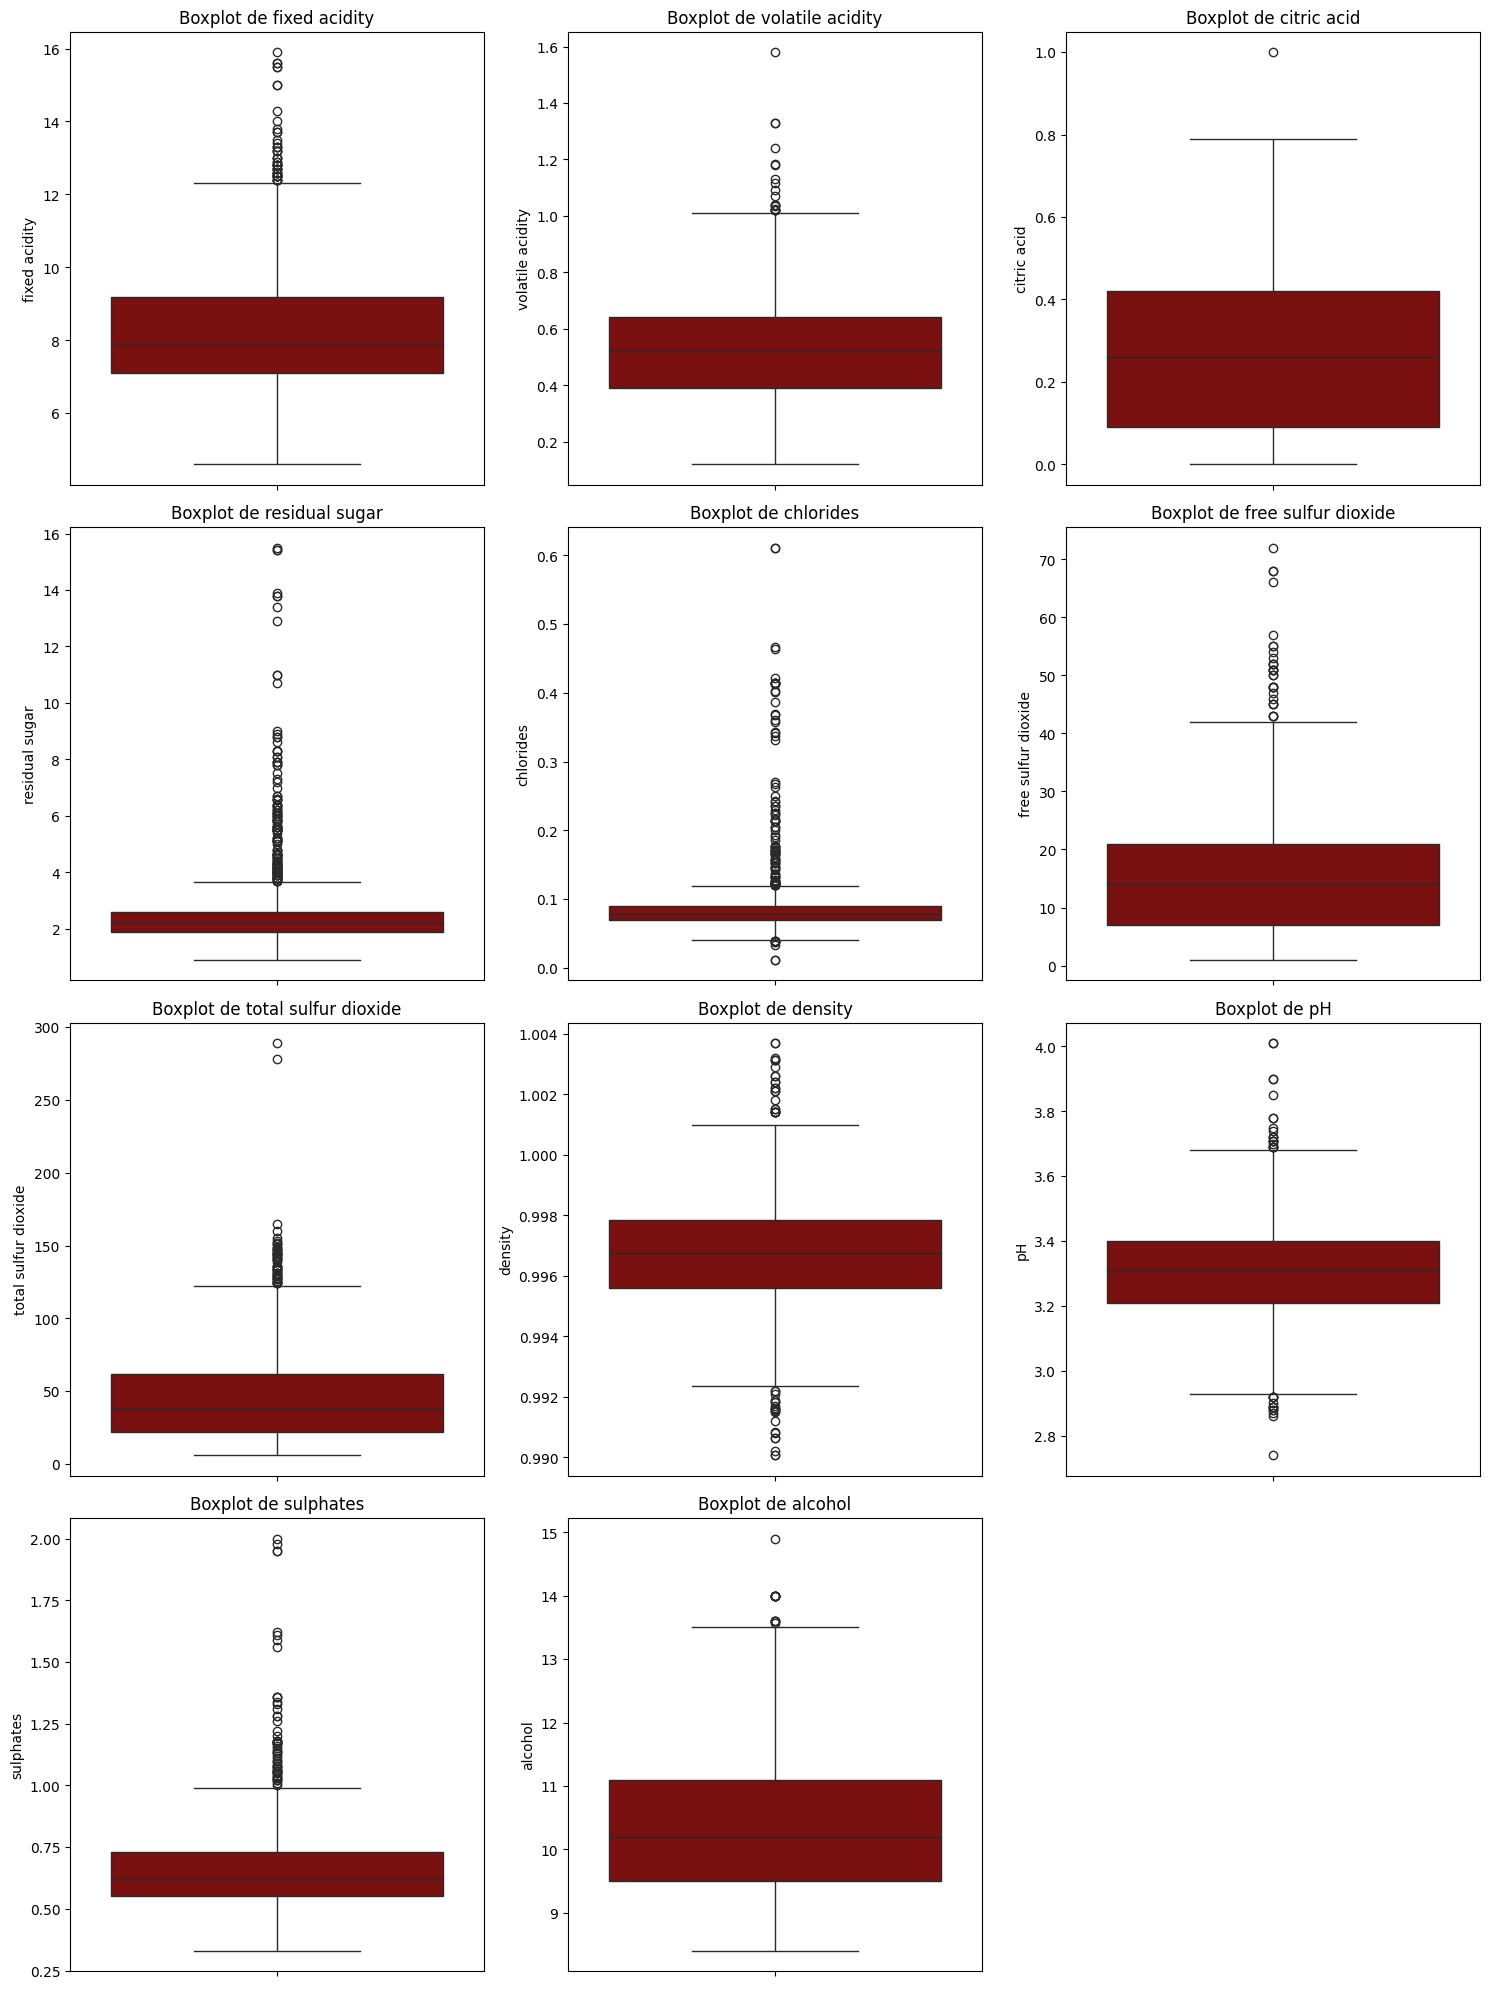

In [110]:
# Boxplots para todas las variables numéricas
plt.figure(figsize=(15, 20))
for i, column in enumerate(df.drop('quality', axis=1).columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df, y=column, color='#8B0000')
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

Objetivo: Identificar outliers en cada variable (puntos fuera de los "bigotes" del boxplot).

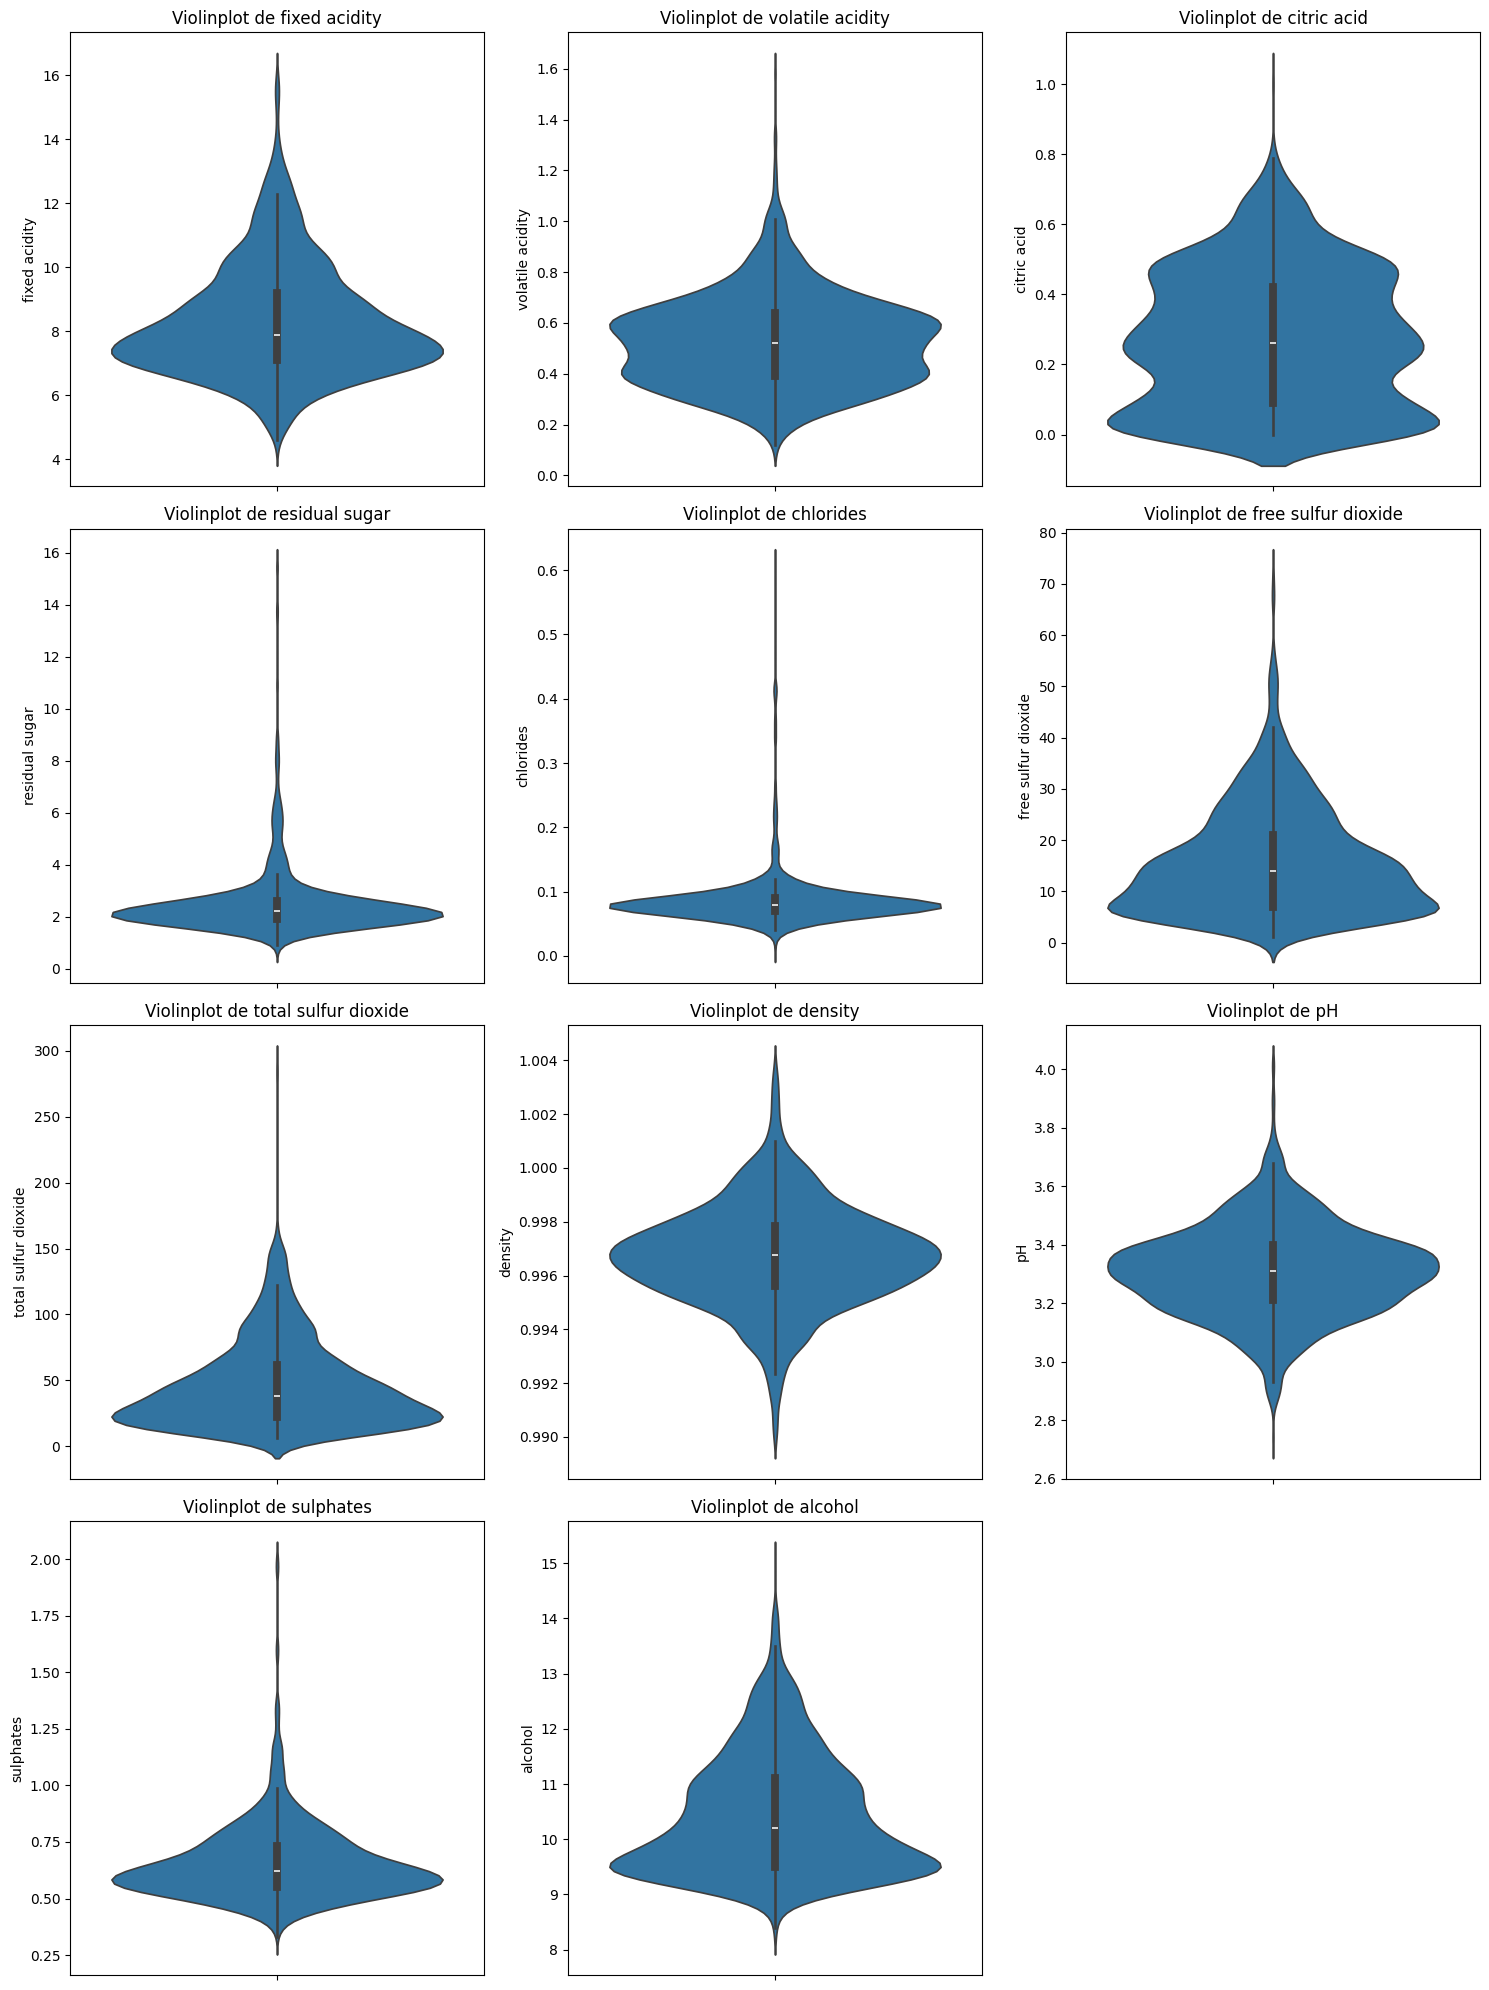

In [111]:
#Violinplot
plt.figure(figsize=(15, 20))
for i, column in enumerate(df.drop('quality', axis=1).columns):
    plt.subplot(4, 3, i+1)
    sns.violinplot(data=df, y=column)
    plt.title(f'Violinplot de {column}')
plt.tight_layout()
plt.show()

Objetivo: Entender la densidad de la distribución (simetría, multimodalidad).


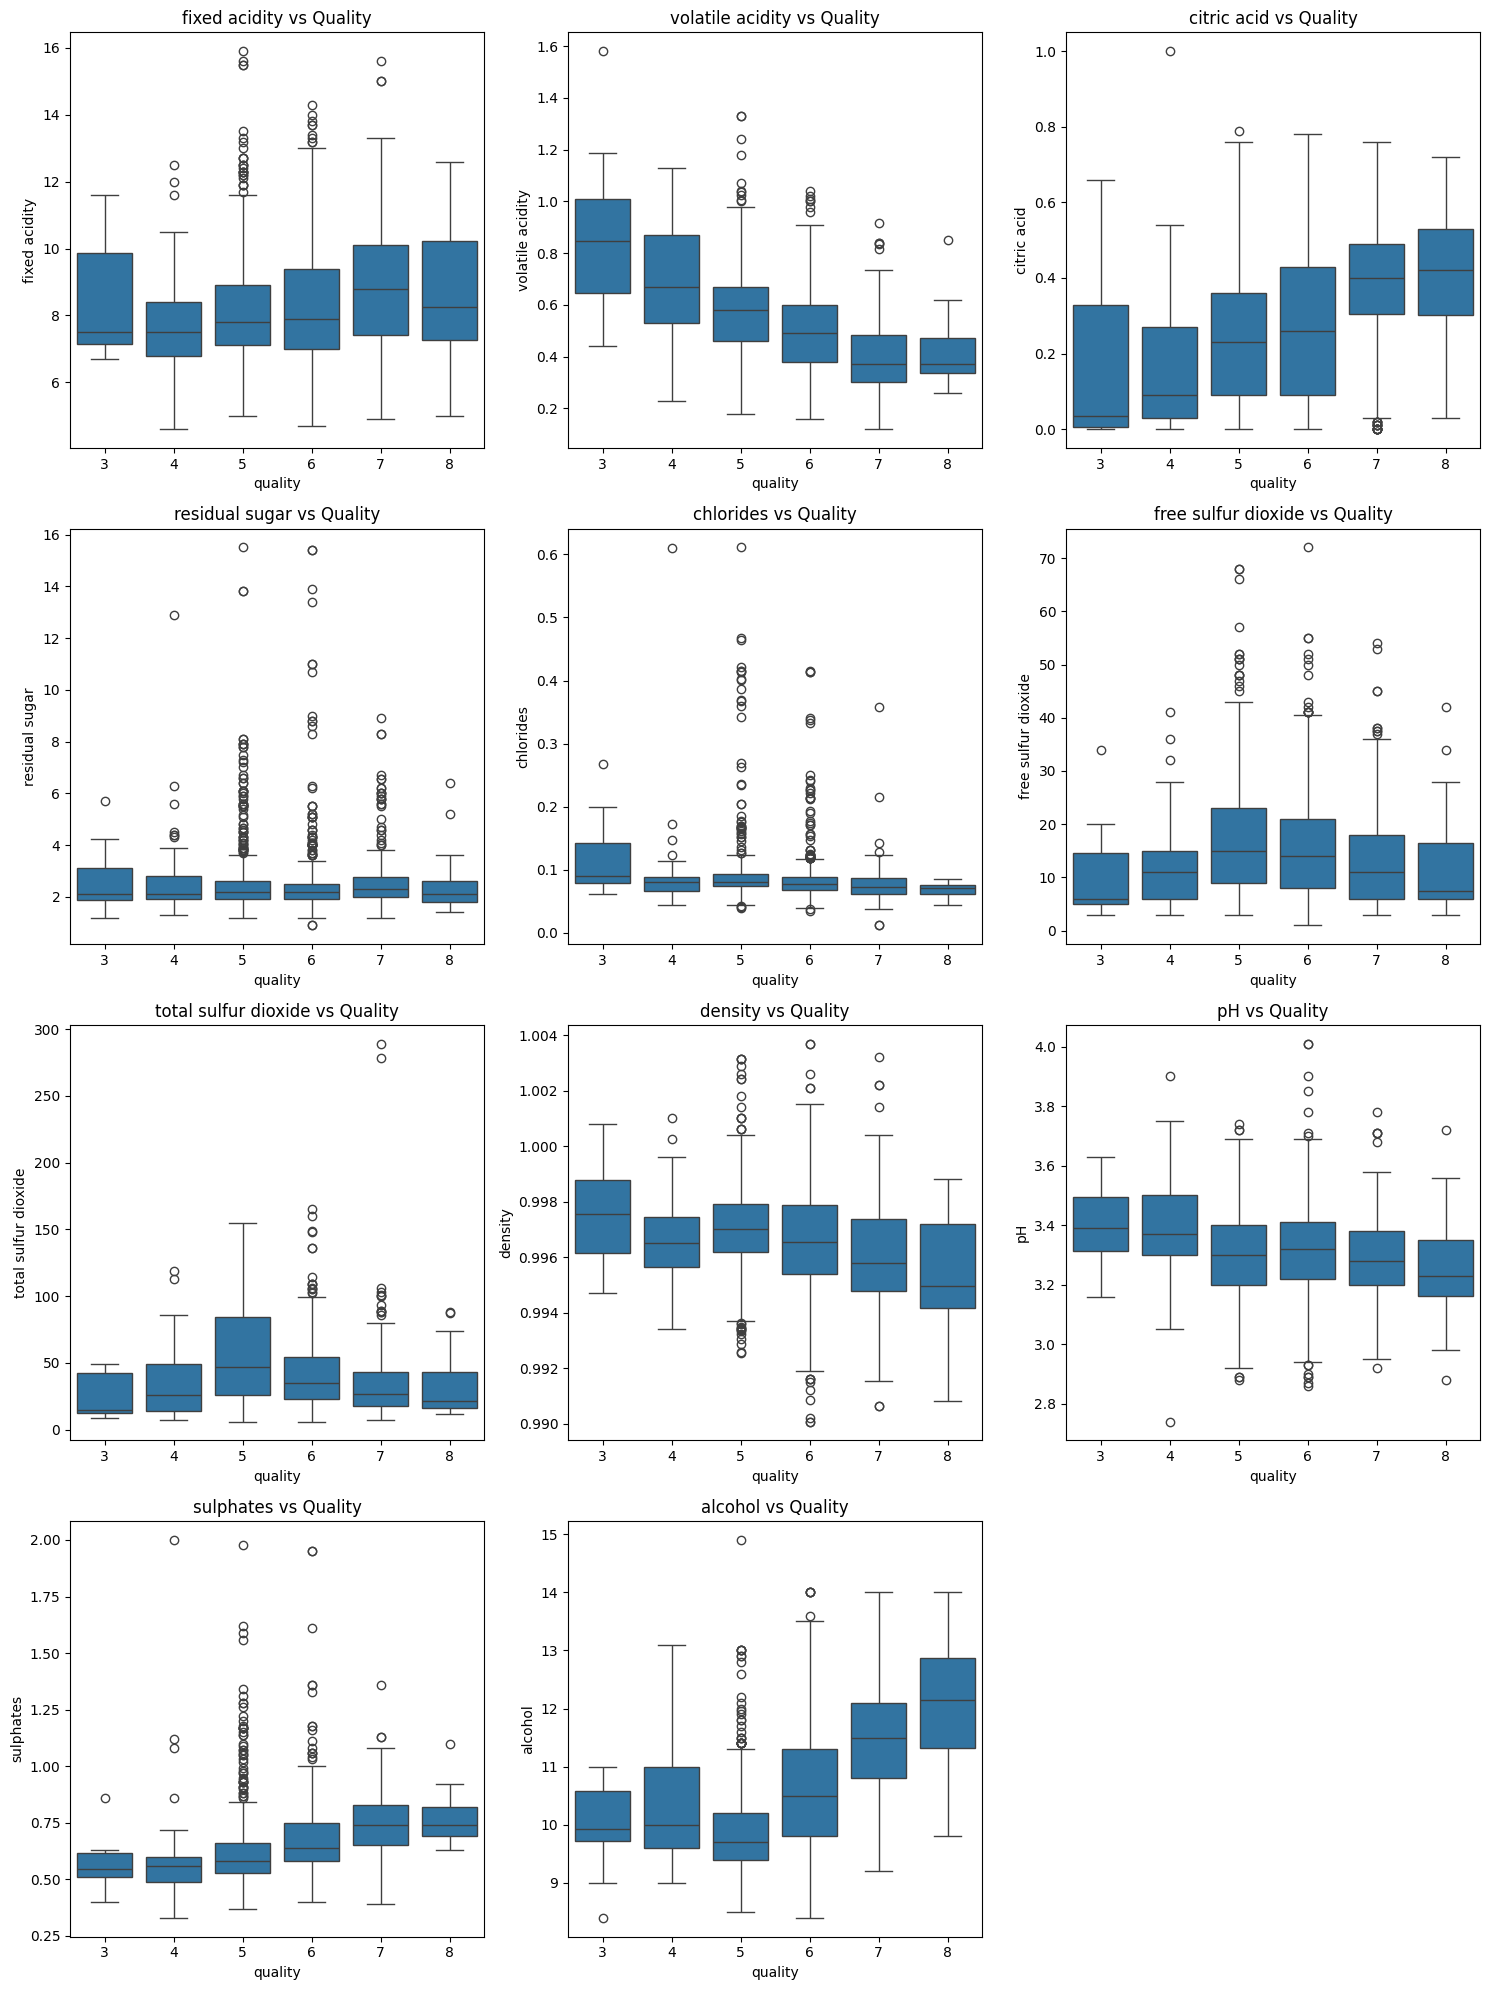

In [112]:
#Relación con la Calidad (Target)
#Boxplots Agrupados por Calidad
plt.figure(figsize=(15, 20))
for i, column in enumerate(df.drop('quality', axis=1).columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df, x='quality', y=column)
    plt.title(f'{column} vs Quality')
plt.tight_layout()
plt.show()

Objetivo: Ver cómo varía cada característica según la calidad.

Patrones esperados:

- Alcohol (porcentaje en volumen): Mayor en vinos de alta calidad.

- Acidez volatil (g/L): Menor en vinos de alta calidad.

- Sulfatos (g/L): Mayor en vinos de alta calidad.

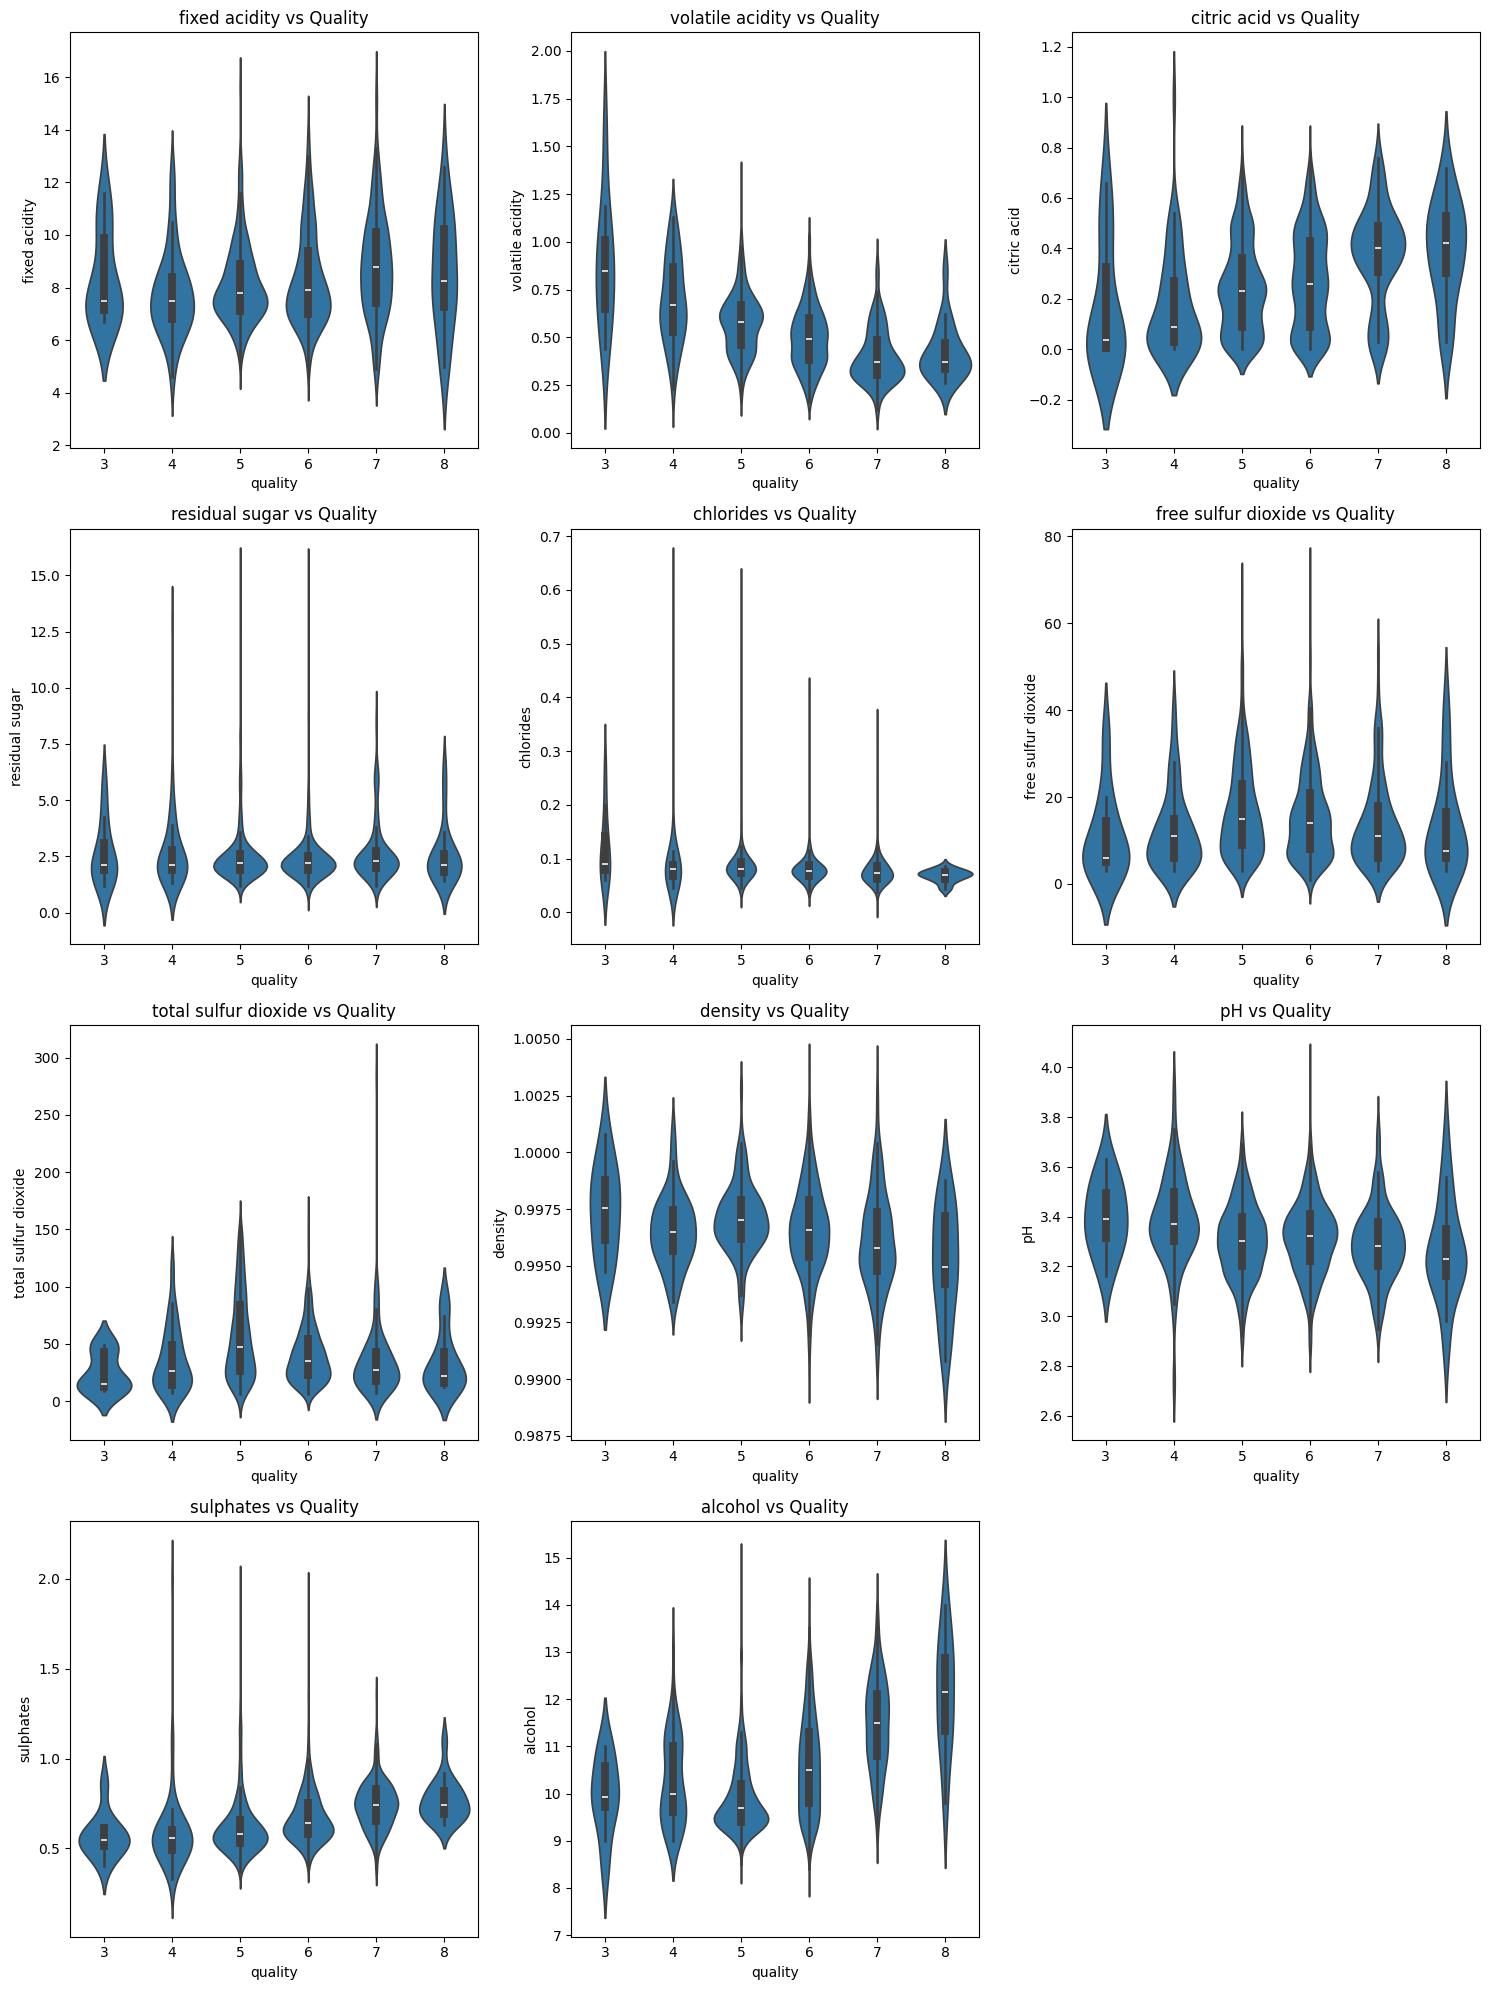

In [113]:
# Violinplots Agrupados por Calidad
plt.figure(figsize=(15, 20))
for i, column in enumerate(df.drop('quality', axis=1).columns):
    plt.subplot(4, 3, i+1)
    sns.violinplot(data=df, x='quality', y=column)
    plt.title(f'{column} vs Quality')
plt.tight_layout()
plt.show()

Objetivo: Combinar distribución y relación con la calidad.

Identificar si las distribuciones cambian significativamente entre calidades.

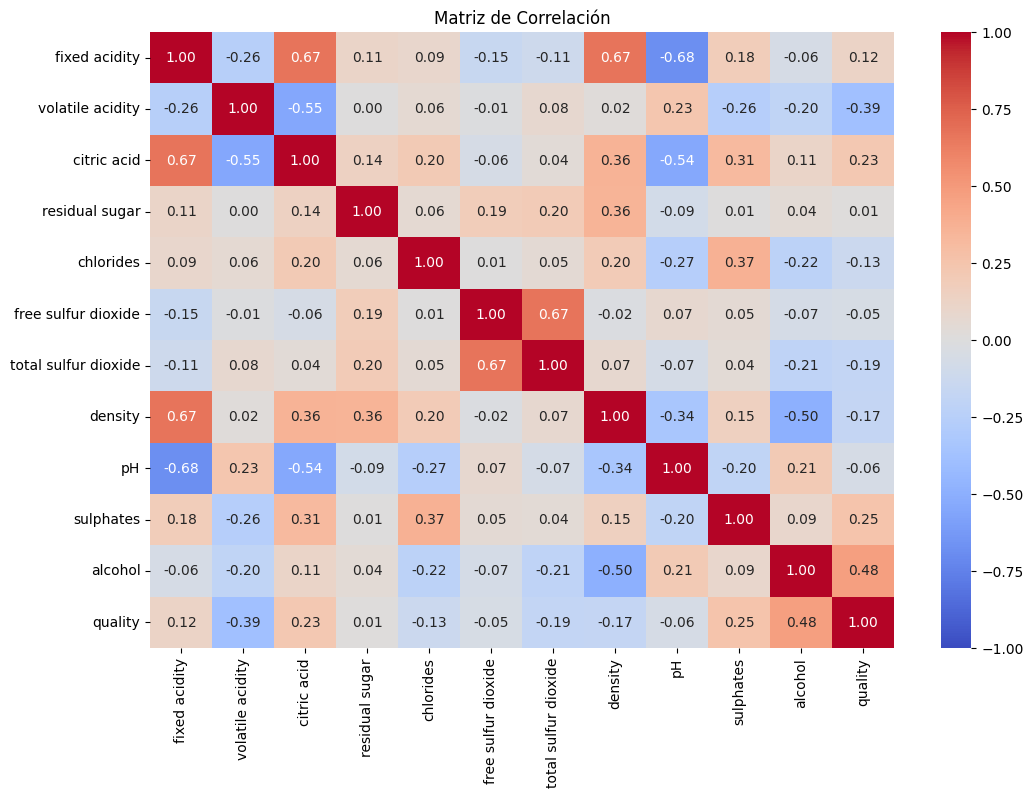

In [114]:
# Matriz de correlación entre las variables
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Las características más relevantes visibles en este mapa de calor serían las siguientes:

* alcohol (correlación positiva) : 0.48

* Acidez volátil (correlación negativa): -0.39

* Sulfatos: 0.25

* Acido cítrico: 0.23

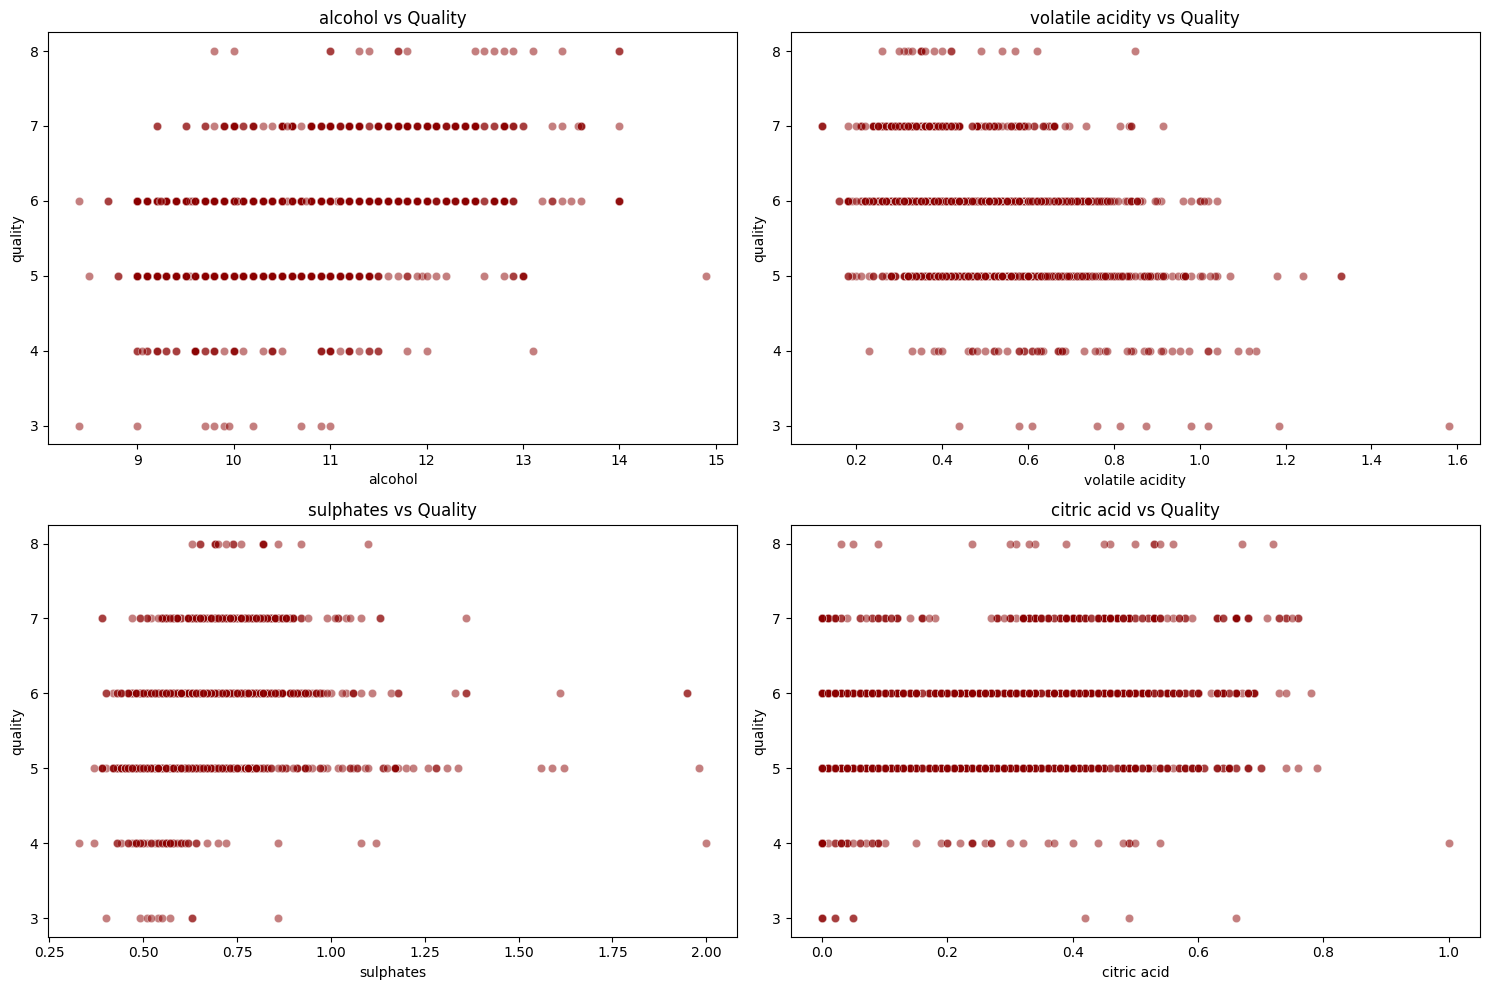

In [115]:
# Scatterplots de Variables Clave vs Calidad
key_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=feature, y='quality', alpha=0.5, color = '#8B0000')
    plt.title(f'{feature} vs Quality')
plt.tight_layout()
plt.show()

Objetivo: Visualizar relaciones no lineales.

Ejemplo: ¿Vinos con más de 13% de alcohol tienden a tener calidad >7?

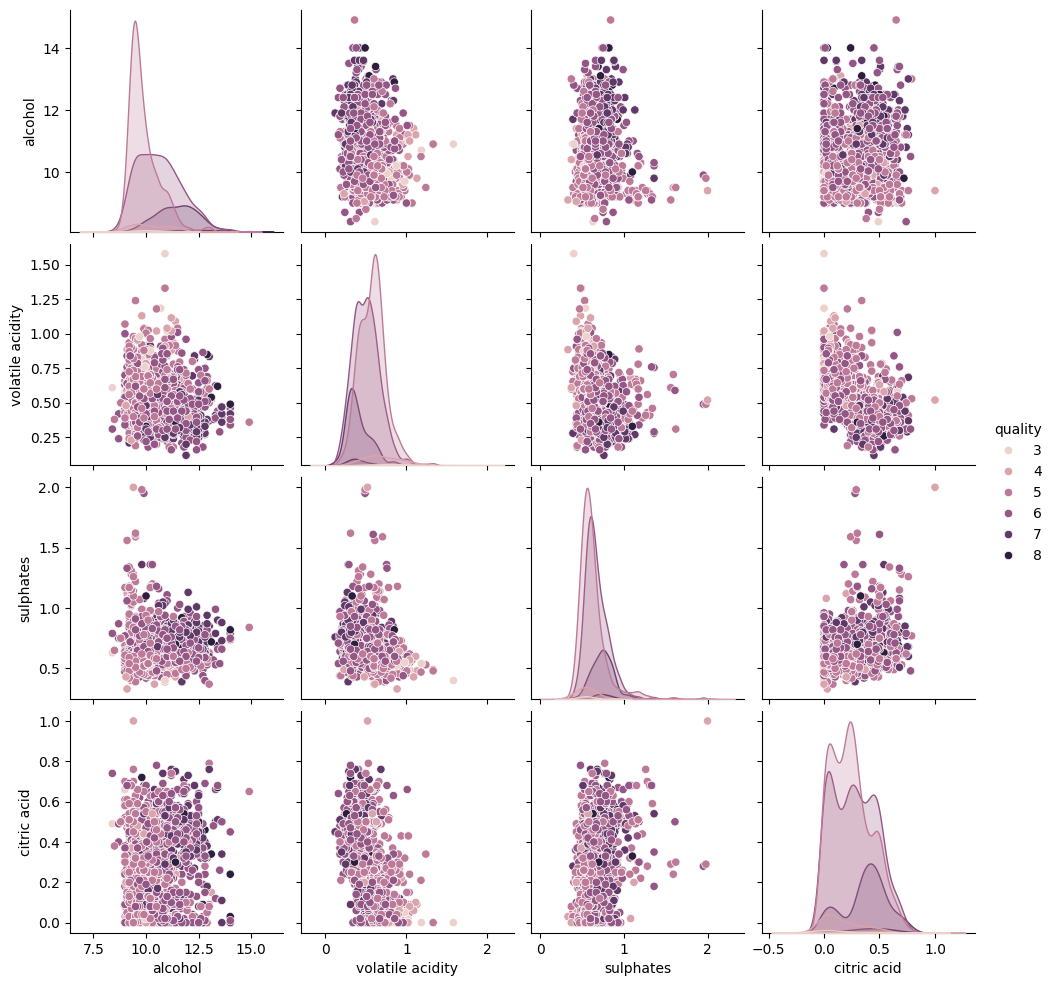

In [116]:
# Análisis de Outliers Multivariante
# Pairplot de Variables Clave (key features)
sns.pairplot(df, vars=key_features, hue='quality');

Objetivo:

Detectar outliers en combinaciones de variables.

Ejemplo: Un vino con alto alcohol pero baja calidad podría ser un outlier.

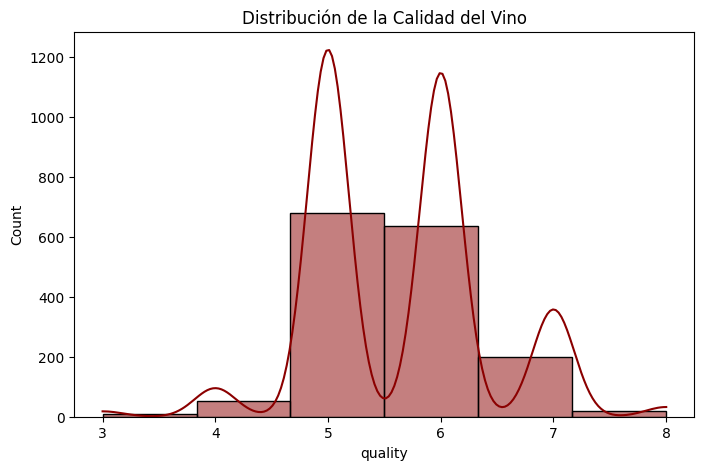

In [117]:
# Distribución de la Calidad
# Histograma de Calidad
plt.figure(figsize=(8, 5))
sns.histplot(df['quality'], bins=6, kde=True, color="#8B0000")
plt.title('Distribución de la Calidad del Vino')
plt.show()

Objetivo: confirmar el desbalanceo de clases (pocos vinos de calidad 3, 4, y 8).

Algunas visualizaciones más:

C:\Users\aguir\AppData\Local\Temp\ipykernel_11648\3617654314.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='quality', palette='Reds')


Text(0, 0.5, 'Count')

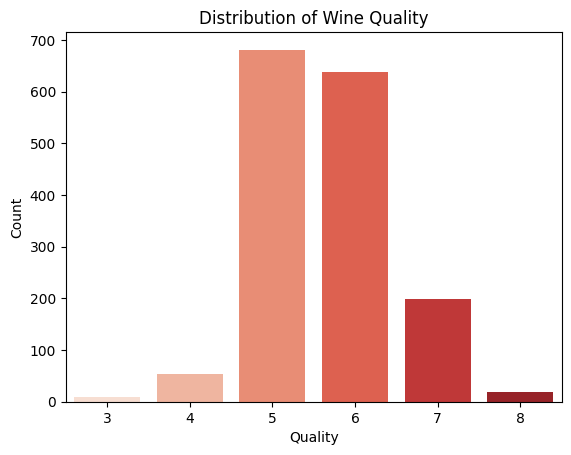

In [118]:
sns.countplot(df, x='quality', palette='Reds')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

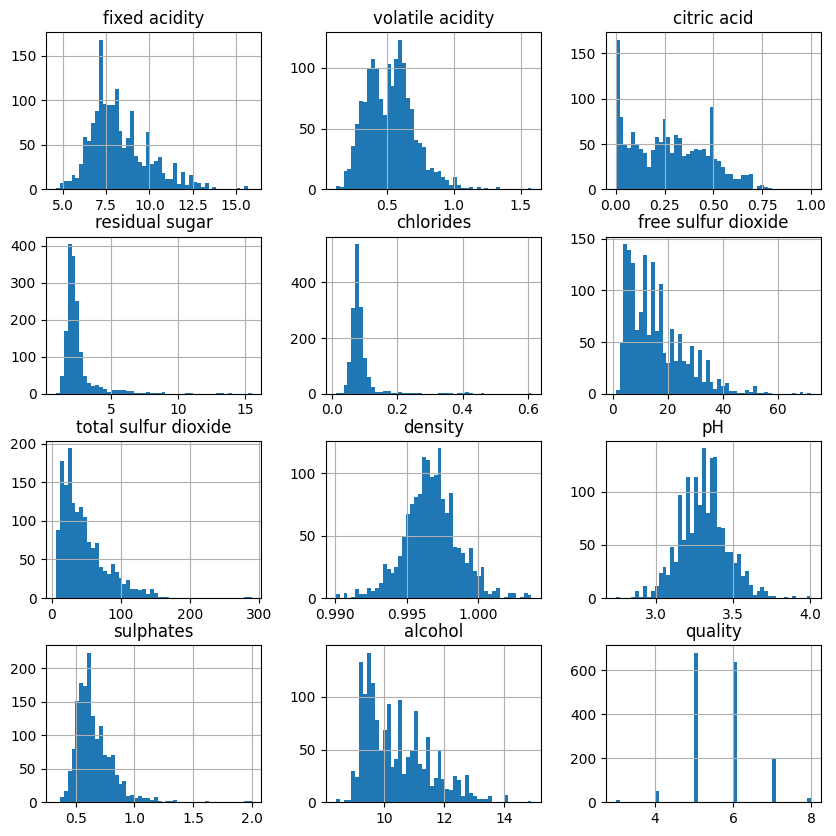

In [119]:
df.hist(figsize=(10,10),bins=50);

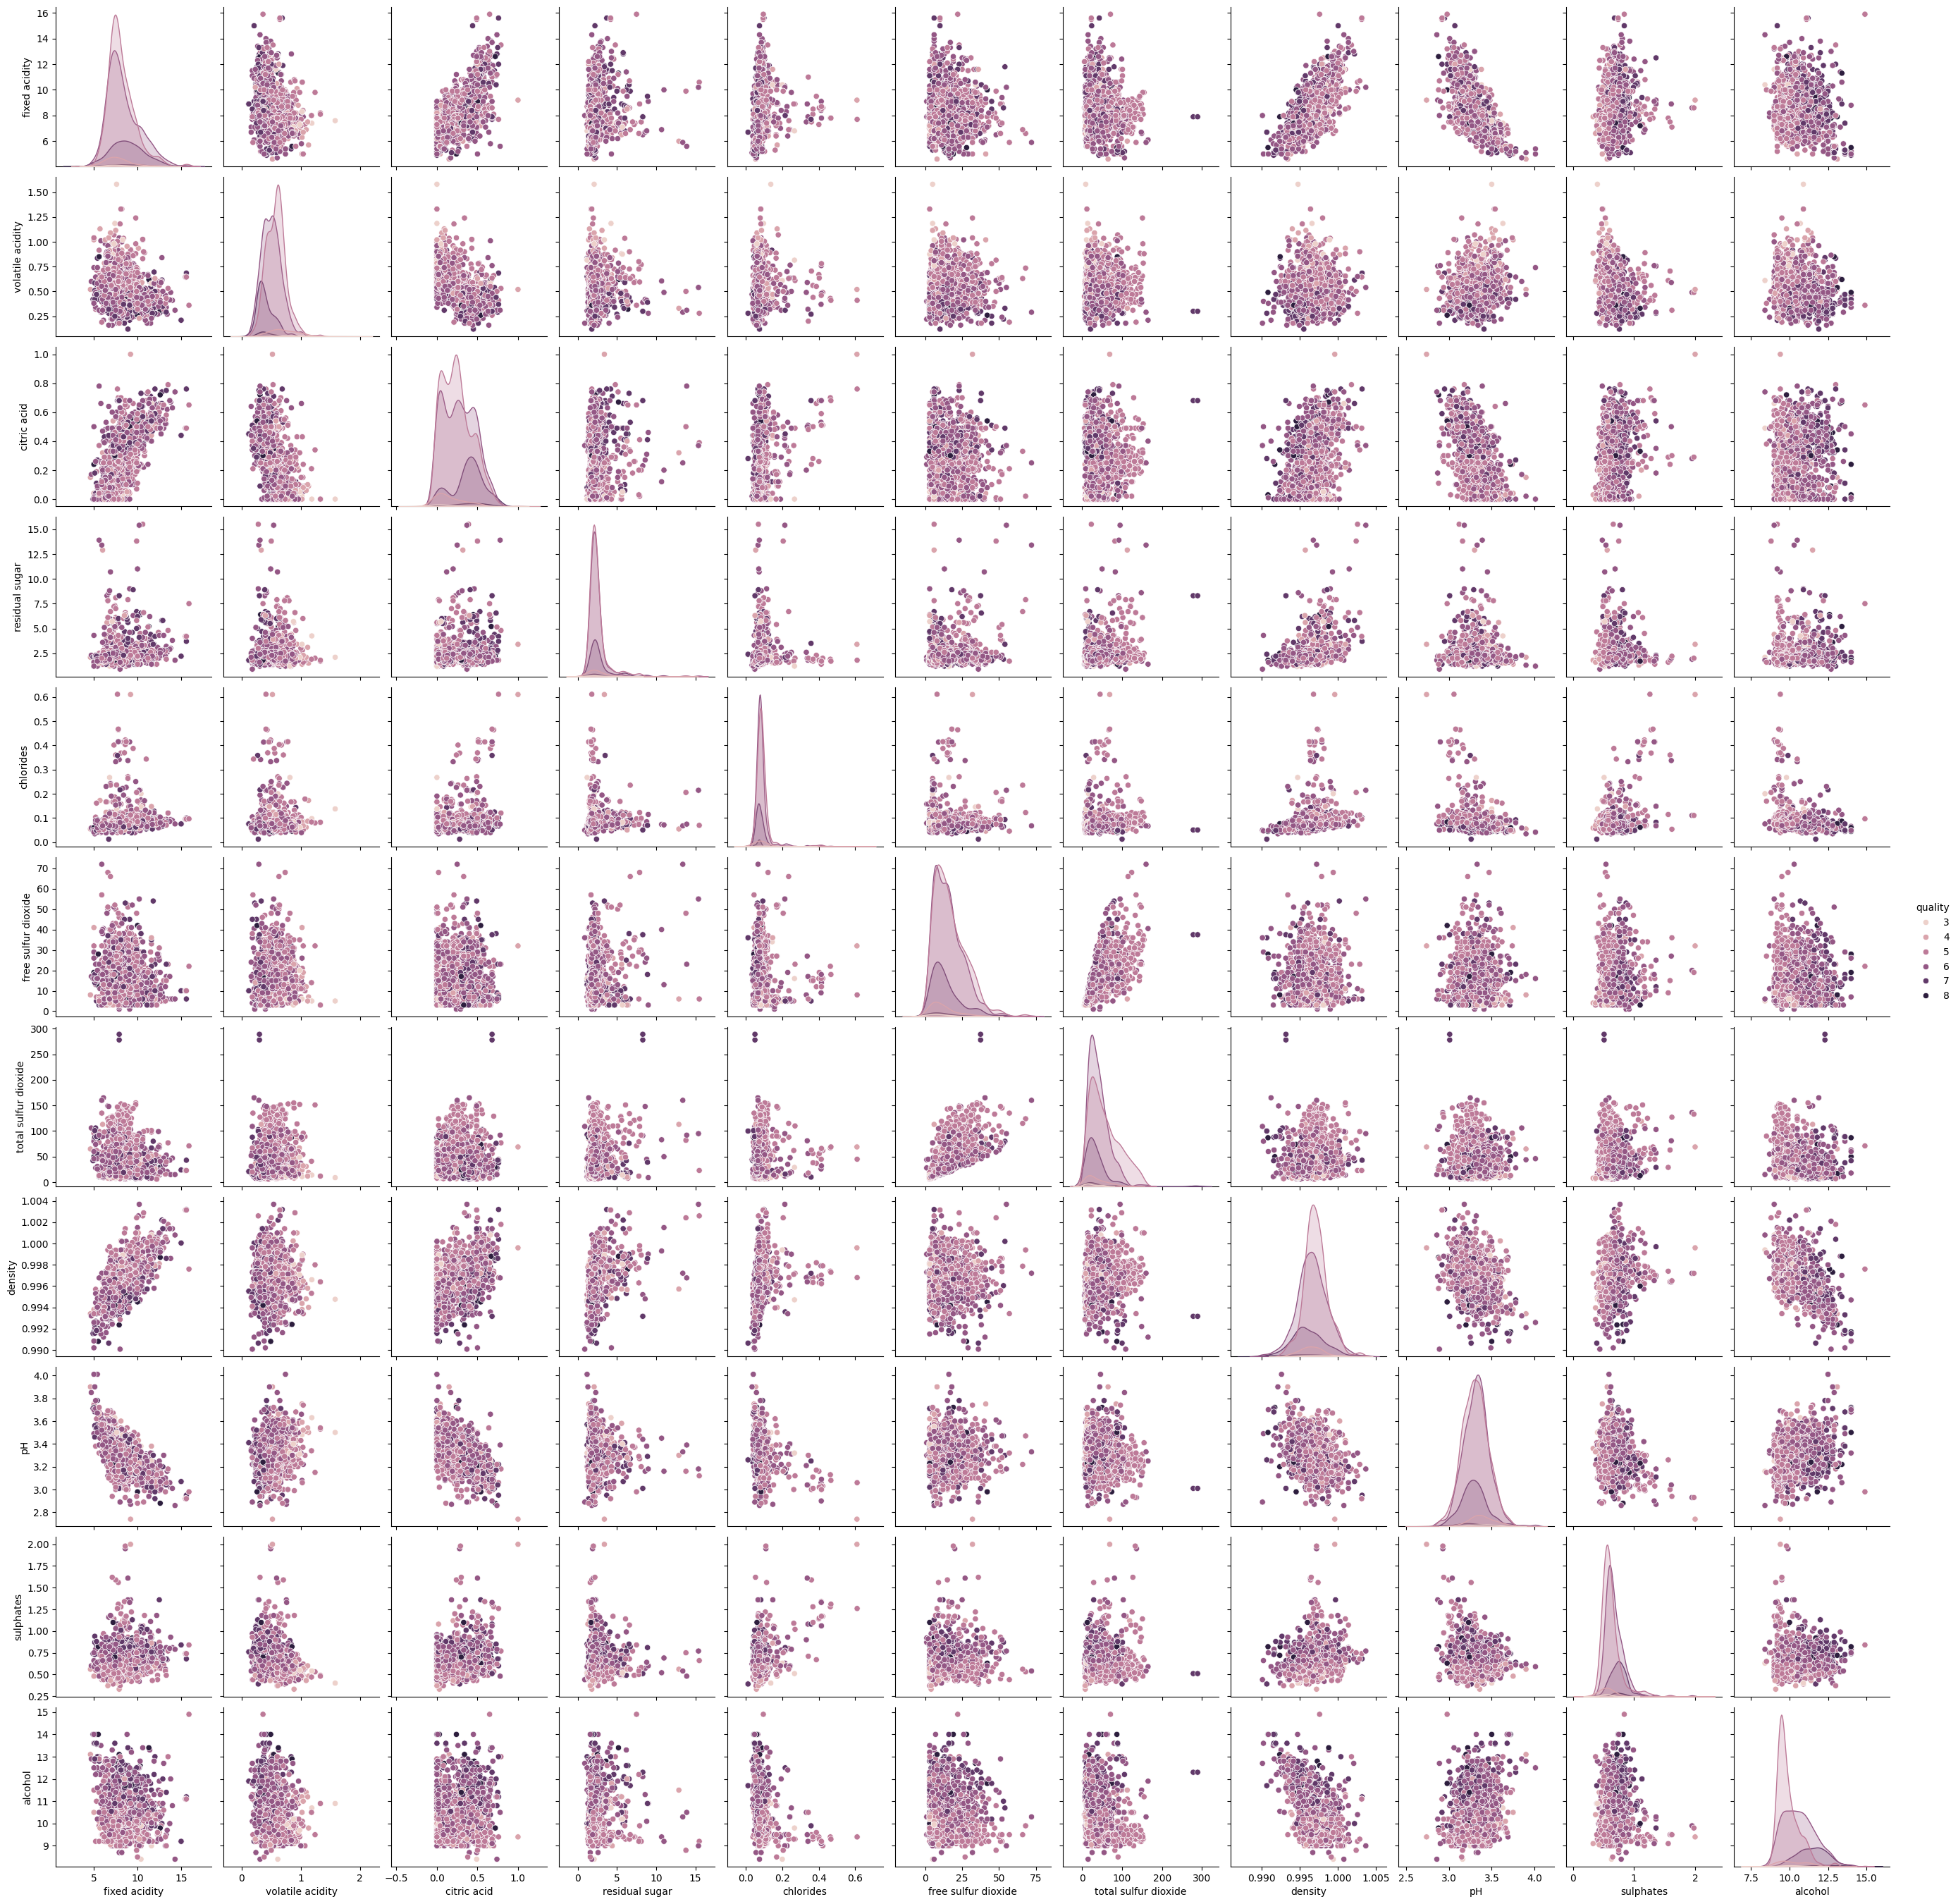

In [84]:
# Pairplot con todas las variables (features)
sns.pairplot(df, hue='quality');

##### Que buscabamos en estas visualizaciones:
Outliers: valores extremos/atípicos. Considerar si eliminarlos o transformarlos (ej: log-transform).

Patrones de Calidad: ¿Qué características diferencian a los vinos de calidad 7-8 de los de 3-4?

Ej: Vinos de alta calidad tienen mayor alcohol y menor acidez volátil.

Correlaciones Fuertes: variables con |correlación| > 0.3 con quality son candidatas para el modelo.

Hallazgos Esperados:
- Alcohol: Vinos con calidad ≥7 tienen alcohol >12.5%.

- Outliers: Vinos con alcohol >14% y calidad baja (posible error en datos).

- Acidez volatil: vinos de baja calidad (≤4) tienen niveles altos (>0.8 g/dm³).

- Sulfatos: Concentraciones >0.8 están asociadas a calidad ≥6.

### LIMPIEZA

In [85]:
df['quality_category'] = pd.cut(df['quality'],
                               bins=[0, 4, 6, 10],
                               labels=['Baja', 'Media', 'Alta'])

In [86]:
df['quality_category'].unique()

['Media', 'Alta', 'Baja']
Categories (3, object): ['Baja' < 'Media' < 'Alta']

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_category      1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


In [120]:
# Eliminamos outliers (solo en columnas numéricas)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
mask = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
df_final = df[~mask.any(axis=1)]

In [121]:
df_final.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Guardamos el modelo final:

In [122]:
df_final.to_csv('df_final.csv', index=False)